In [41]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
ds = pd.read_table('adult1.txt')
ds.head()

,"Age,Workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital-gain,capital-loss,hourse-perweek,native-country,class"
0,"39, State-gov, 77516, Bachelors, 13, Never-mar..."
1,"50, Self-emp-not-inc, 83311, Bachelors, 13, Ma..."
2,"38, Private, 215646, HS-grad, 9, Divorced, Han..."
3,"53, Private, 234721, 11th, 7, Married-civ-spou..."
4,"28, Private, 338409, Bachelors, 13, Married-ci..."


In [43]:
read_file = pd.read_csv(r"adult2.txt")
read_file.to_csv(r"adult2.csv", index=None)


In [44]:
df = pd.read_csv('adult2.csv')
print(df)

       Age          Workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

                   marital          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [45]:
df.shape

(32561, 15)

In [46]:
df['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [47]:
print(df.groupby('class').size())

class
 <=50K    24720
 >50K      7841
dtype: int64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


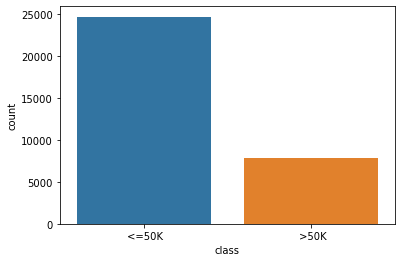

In [48]:
import seaborn as sns
sns.countplot(df['class'],label="Count")
plt.show()

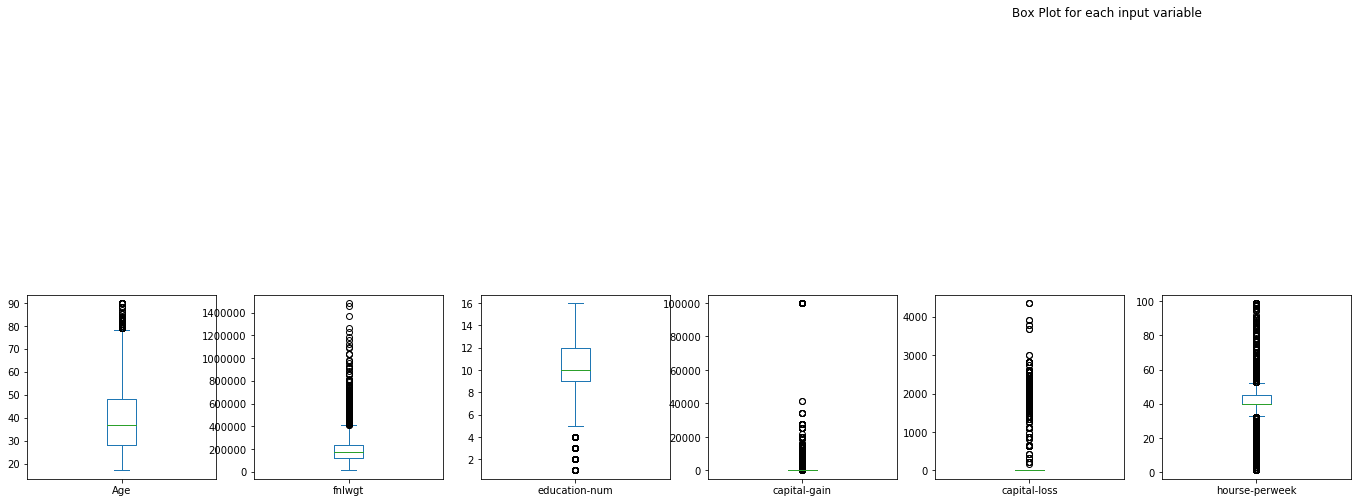

In [49]:
df.drop('class', axis=1).plot(kind='box', subplots=True, layout=(10,10), sharex=False, sharey=False, figsize=(40,40), title='Box Plot for each input variable')
plt.savefig('Adult')
plt.show()

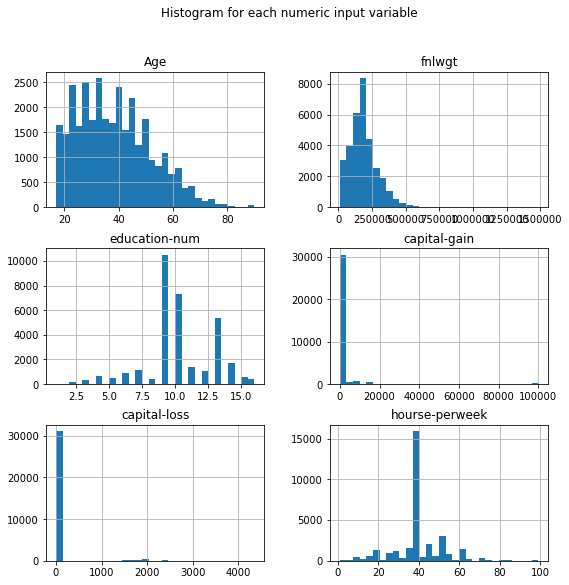

In [50]:
import pylab as pl
df.drop('class' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('adult_hist')
plt.show()

In [51]:
attribute_names = ['Age', 'Workclass', 'fnlwgt', 'education','education-num','marital','occupation','relationship','race','sex','capital-gain','hourse-perweek','native-country']


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [53]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["Workclass"] = ord_enc.fit_transform(df[["Workclass"]].astype('str'))
df["education"] = ord_enc.fit_transform(df[["education"]])
df["marital"] = ord_enc.fit_transform(df[["marital"]])
df["occupation"] = ord_enc.fit_transform(df[["occupation"]])
df["relationship"] = ord_enc.fit_transform(df[["relationship"]])
df["sex"] = ord_enc.fit_transform(df[["sex"]])
df["race"] = ord_enc.fit_transform(df[["race"]])
df["native-country"] = ord_enc.fit_transform(df[["native-country"]])
df["class"] = ord_enc.fit_transform(df[["class"]])
df[2:4]

X = df[attribute_names]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train[2:4])

      Age  Workclass  fnlwgt  education  education-num  marital  occupation  \
4747   42        4.0  107762       12.0             14      2.0        10.0   
8369   26        4.0   35917       11.0              9      2.0        12.0   

      relationship  race  sex  capital-gain  hourse-perweek  native-country  
4747           0.0   4.0  1.0             0              40            39.0  
8369           0.0   4.0  1.0             0              40            39.0  


In [54]:
#from sklearn.preprocessing import LabelEncoder
#enc = LabelEncoder()
#X_train[2] = enc.fit_transform(X_train[2].astype('str'))

In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.78
Accuracy of Logistic regression classifier on test set: 0.78


In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.77


In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.82
Accuracy of LDA classifier on test set: 0.81


In [58]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.79
Accuracy of GNB classifier on test set: 0.79


In [59]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.80
Accuracy of SVM classifier on test set: 0.79


In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[5661  498]
 [1409  573]]
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86      6159
         1.0       0.54      0.29      0.38      1982

    accuracy                           0.77      8141
   macro avg       0.67      0.60      0.62      8141
weighted avg       0.74      0.77      0.74      8141

